# Body Performance Data - EDA

_ | Details
--- | ---
Tasks | Perform EDA on [Body Performance Data](https://www.kaggle.com/kukuroo3/body-performance-data) dataset.
Owner | kukuroo3
ID | kukuroo3/body-performance-data
Tags | No tags yet
Subtitle | multi class classification
Description | This is data that confirmed the grade of performance with age and some exercise performance data. <br>Source: [Korea Sports Promotion Foundation](https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=ace0aea7-5eee-48b9-b616-637365d665c1)<br>Some post-processing and filtering has done from the raw data.
License | CC0: Public Domain

## Setup

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
# import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import seaborn as sns
from sklearn import preprocessing

# import & magics for import statements
import os
%load_ext dotenv
%dotenv

cannot find .env file


In [2]:
px.defaults.template = "plotly_dark"
pio.templates.default = "plotly_dark"

In [3]:
# Setup env variables
KAGGLE_USERNAME = os.getenv("KAGGLE_USERNAME")
KAGGLE_KEY = os.getenv("KAGGLE_KEY")

In [33]:
# with open('dataset-metadata.json') as metadata:
#     dataset_metadata = json.load(metadata)
# dataset_metadata

In [34]:
filename = 'bodyPerformance.csv'

In [35]:
df = pd.read_csv(filename)

In [36]:
sns.set_theme()

## Inspecting the dataset

In [37]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [38]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


### Inspecting the datatypes and missing values

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [40]:
df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

### Inspecting each variable and its distribution

In [41]:
df.describe(include='all')

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
count,13393.000000,13393,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
freq,NaN,8467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3349
mean,36.775106,NaN,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627,NaN
std,13.625639,NaN,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000,NaN
min,21.000000,NaN,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000,NaN
25%,25.000000,NaN,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000,NaN
50%,32.000000,NaN,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000,NaN
75%,48.000000,NaN,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000,NaN


### Visualizing the distribution of each variable

age


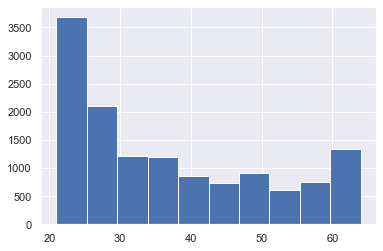

gender


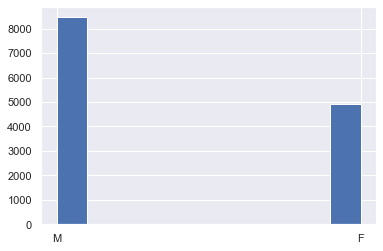

height_cm


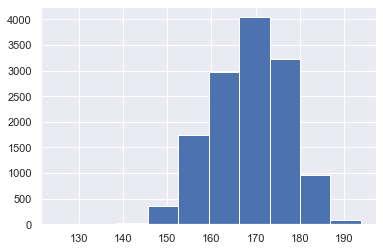

weight_kg


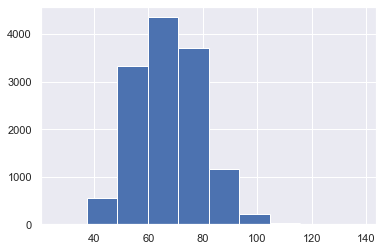

body fat_%


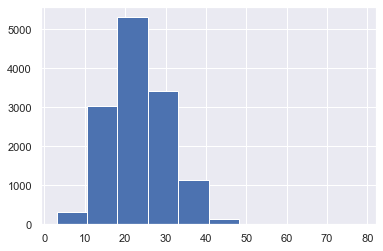

diastolic


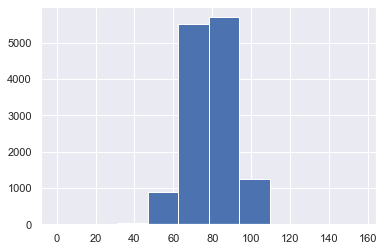

systolic


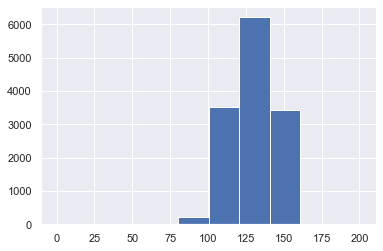

gripForce


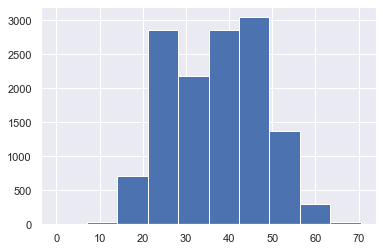

sit and bend forward_cm


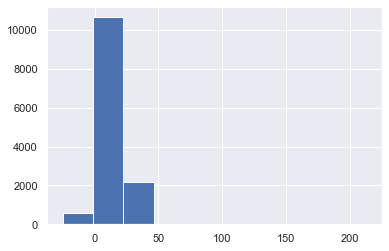

sit-ups counts


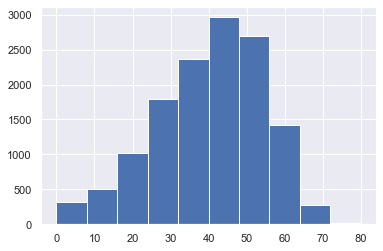

broad jump_cm


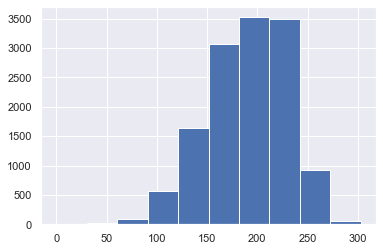

class


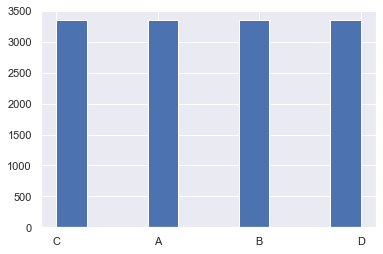

In [64]:
for col in df.columns:
    print(col)
    df[col].hist()
    plt.show()

# END